## Dataset Description

This is an event log of an incident management process extracted from data gathered from the audit system of an instance of the ServiceNowTM platform used by an IT company. The event log is enriched with data loaded from a relational database underlying a corresponding process-aware information system. Information was anonymized for privacy.

Dataset Link : https://archive.ics.uci.edu/ml/datasets/Incident+management+process+enriched+event+log

Attribute Information:

1. number: incident identifier (24,918 different values);
2. incident state: eight levels controlling the incident management process transitions from opening until closing the case;
3. active: boolean attribute that shows whether the record is active or closed/canceled;
4. reassignment_count: number of times the incident has the group or the support analysts changed;
5. reopen_count: number of times the incident resolution was rejected by the caller;
6. sys_mod_count: number of incident updates until that moment;
7. made_sla: boolean attribute that shows whether the incident exceeded the target SLA;
8. caller_id: identifier of the user affected;
9. opened_by: identifier of the user who reported the incident;
10. opened_at: incident user opening date and time;
11. sys_created_by: identifier of the user who registered the incident;
12. sys_created_at: incident system creation date and time;
13. sys_updated_by: identifier of the user who updated the incident and generated the current log record;
14. sys_updated_at: incident system update date and time;
15. contact_type: categorical attribute that shows by what means the incident was reported;
16. location: identifier of the location of the place affected;
17. category: first-level description of the affected service;
18. subcategory: second-level description of the affected service (related to the first level description, i.e., to category);
19. u_symptom: description of the user perception about service availability;
20. cmdb_ci: (confirmation item) identifier used to report the affected item (not mandatory);
21. impact: description of the impact caused by the incident (values: 1Ã¢â‚¬â€œHigh; 2Ã¢â‚¬â€œMedium; 3Ã¢â‚¬â€œLow);
22. urgency: description of the urgency informed by the user for the incident resolution (values: 1Ã¢â‚¬â€œHigh; 2Ã¢â‚¬â€œMedium; 3Ã¢â‚¬â€œLow);
23. priority: calculated by the system based on 'impact' and 'urgency';
24. assignment_group: identifier of the support group in charge of the incident;
25. assigned_to: identifier of the user in charge of the incident;
26. knowledge: boolean attribute that shows whether a knowledge base document was used to resolve the incident;
27. u_priority_confirmation: boolean attribute that shows whether the priority field has been double-checked;
28. notify: categorical attribute that shows whether notifications were generated for the incident;
29. problem_id: identifier of the problem associated with the incident;
30. rfc: (request for change) identifier of the change request associated with the incident;
31. vendor: identifier of the vendor in charge of the incident;
32. caused_by: identifier of the RFC responsible by the incident;
33. close_code: identifier of the resolution of the incident;
34. resolved_by: identifier of the user who resolved the incident;
35. resolved_at: incident user resolution date and time (dependent variable);
36. closed_at: incident user close date and time (dependent variable).

Here, we the target variable will be a calculated column 'Closing time (min)' which is the difference between columns 'opened_at' and 'closed_at'.


In [96]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import datetime
from datetime import datetime

In [97]:
#Import Datset
url= 'C:\\Users\\gaura\\Downloads\\iml\\incident_event_log.csv'
df_im = pd.read_csv(url)

In [98]:
#Display top five rows

pd.set_option('display.max_columns', 50000)
pd.set_option('display.max_rows', 50000)
df_im.head(5)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [99]:
print(df_im.shape)

(141712, 36)


In [100]:
df_im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

In [101]:
#Taking out only the records with 'incident_status' == 'closed'

df_im2 = df_im.loc[df_im['incident_state'] == 'Closed'].reset_index().drop(columns={'index'})
df_im2.shape

(24985, 36)

In [102]:
# Drop the columns which are either redundant or do not impact the analysis
# Columns identified to be dropped are caller_id, opened_by, sys_created_by,sys_created_at, sys_updated_by, sys_updated_at,location,subcategory, u_symptom, cmdb_ci,impact,urgency,assigned_to,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at

cols = {'caller_id', 'opened_by', 'sys_created_by','sys_created_at','sys_updated_by', 'sys_updated_at','location','subcategory', 'u_symptom', 'cmdb_ci','impact','urgency','assigned_to','notify','problem_id','rfc','vendor','caused_by','closed_code','resolved_by','resolved_at'}
df_im2 = df_im2.drop(columns= cols)

In [103]:
#Let's check missing values.
df_im2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24985 entries, 0 to 24984
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   number                   24985 non-null  object
 1   incident_state           24985 non-null  object
 2   active                   24985 non-null  bool  
 3   reassignment_count       24985 non-null  int64 
 4   reopen_count             24985 non-null  int64 
 5   sys_mod_count            24985 non-null  int64 
 6   made_sla                 24985 non-null  bool  
 7   opened_at                24985 non-null  object
 8   contact_type             24985 non-null  object
 9   category                 24985 non-null  object
 10  priority                 24985 non-null  object
 11  assignment_group         24985 non-null  object
 12  knowledge                24985 non-null  bool  
 13  u_priority_confirmation  24985 non-null  bool  
 14  closed_at                24985 non-nul

In [104]:
df_im2['closed_at'] = df_im2['closed_at'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y %H:%M'))
df_im2['opened_at'] = df_im2['opened_at'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y %H:%M'))

In [105]:
df_im2['diff_in_days']=((df_im2['closed_at']-df_im2['opened_at'])).dt.days
df_im2['diff_in_sec']=((df_im2['closed_at']-df_im2['opened_at'])).dt.seconds
df_im2['Closing time (min)'] = (df_im2['diff_in_days']*24*60) + (df_im2['diff_in_sec']/60)

df_im2 = df_im2.drop(columns={'closed_at','opened_at','diff_in_days','diff_in_sec'})

df_im2['Closing time (min)'] = df_im2['Closing time (min)'].astype('int64')

In [106]:
#Since some missing values contains ? sign, replacing ? signs with np.nan
df_im2 = df_im2.replace('?',np.nan)

## Check columns for missing values
following columns identified with missing values: reassignment_count,reopen_count, sys_mod_count, category, assignment_group

In [107]:
# finding the average for missing columns by grouping them into priority category

df_im2[["reassignment_count","reopen_count","sys_mod_count","priority"]].groupby("priority").mean()
#train[["Survived","Sex"]].groupby("Sex").mean().sort_values(by='Survived',ascending=False)

,reassignment_count,reopen_count,sys_mod_count
priority,,,
1 - Critical,1.151292,0.000000,10.785978
2 - High,1.460784,0.014706,8.394608
3 - Moderate,0.933869,0.013855,6.595308
4 - Low,0.835264,0.002574,7.375804


In [108]:
# rows having missing values in reassignment_count column
df_im2[df_im2["reassignment_count"].isnull()]
#df[df['horsepower'].isnull()]

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,contact_type,category,priority,assignment_group,knowledge,u_priority_confirmation,Closing time (min)


In [109]:
# findind the index of rows with missing values in reassignment_count column
nan_index = df_im2[df_im2['reassignment_count'].isnull()].index
nan_index

Int64Index([], dtype='int64')

In [110]:
#replacing all missing values in column reassignment_count with priority group average
df_im2["reassignment_count"] = df_im2.groupby("priority")["reassignment_count"].transform(lambda x: x.fillna(x.mean()))
       

In [111]:
# following are the replaced values for reassignment_count column
df_im2.loc[nan_index]
nan_index

Int64Index([], dtype='int64')

In [112]:
#similarly replacing the missing values in columns reopen_count and sys_mod_count
df_im2["reopen_count"] = df_im2.groupby("priority")["reopen_count"].transform(lambda x: x.fillna(x.mean()))
df_im2["sys_mod_count"] = df_im2.groupby("priority")["sys_mod_count"].transform(lambda x: x.fillna(x.mean()))

In [113]:
# The system might not make a proper sense if the replaced values of these columns contain float value for ex an incident cannot be opened 1.5 times or it cannot have float number of updates
# Hence we will round of the replaced values

df_im2['reassignment_count'] = df_im2['reassignment_count'].round(0)
df_im2['reopen_count'] = df_im2['reopen_count'].round(0)
df_im2['sys_mod_count'] = df_im2['sys_mod_count'].round(0)


In [114]:
# columns category,assignment_group also have missing values we will replace those with mode of the column

print(df_im2["category"].mode())
print(df_im2["assignment_group"].mode())

0    Category 42
dtype: object
0    Group 70
dtype: object


In [115]:
# missing values in category column
df_im2[df_im2["category"].isnull()]

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,contact_type,category,priority,assignment_group,knowledge,u_priority_confirmation,Closing time (min)
168,INC0000358,Closed,False,0,0,3,True,Phone,NaN,4 - Low,NaN,True,False,13011
169,INC0000358,Closed,False,0,0,4,True,Phone,NaN,4 - Low,NaN,True,False,13011
170,INC0000359,Closed,False,0,0,51,False,Phone,NaN,4 - Low,Group 31,True,True,199823
447,INC0000828,Closed,False,0,0,4,False,Phone,NaN,2 - High,NaN,True,False,8276
448,INC0000829,Closed,False,0,0,2,True,Phone,NaN,3 - Moderate,Group 39,True,False,9776
937,INC0001495,Closed,False,0,0,3,True,Phone,NaN,3 - Moderate,NaN,True,False,7282
1110,INC0001766,Closed,False,0,0,2,True,Phone,NaN,3 - Moderate,Group 65,True,False,7222
3245,INC0005103,Closed,False,0,0,3,False,Phone,NaN,3 - Moderate,NaN,True,False,21612


In [116]:
#index of missing values in category column
nan_index = df_im2[df_im2['category'].isnull()].index
nan_index

Int64Index([168, 169, 170, 447, 448, 937, 1110, 3245], dtype='int64')

In [117]:
#missing values for category column are replaced by mode of the column
df_im2['category'].fillna(df_im2['category'].mode()[0], inplace=True)


In [118]:
#Showing the replaced values for column category 
df_im2.loc[nan_index]

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,contact_type,category,priority,assignment_group,knowledge,u_priority_confirmation,Closing time (min)
168,INC0000358,Closed,False,0,0,3,True,Phone,Category 42,4 - Low,NaN,True,False,13011
169,INC0000358,Closed,False,0,0,4,True,Phone,Category 42,4 - Low,NaN,True,False,13011
170,INC0000359,Closed,False,0,0,51,False,Phone,Category 42,4 - Low,Group 31,True,True,199823
447,INC0000828,Closed,False,0,0,4,False,Phone,Category 42,2 - High,NaN,True,False,8276
448,INC0000829,Closed,False,0,0,2,True,Phone,Category 42,3 - Moderate,Group 39,True,False,9776
937,INC0001495,Closed,False,0,0,3,True,Phone,Category 42,3 - Moderate,NaN,True,False,7282
1110,INC0001766,Closed,False,0,0,2,True,Phone,Category 42,3 - Moderate,Group 65,True,False,7222
3245,INC0005103,Closed,False,0,0,3,False,Phone,Category 42,3 - Moderate,NaN,True,False,21612


In [119]:
#similaryly replacing values for column assignment_group
df_im2['assignment_group'].fillna(df_im2['assignment_group'].mode()[0], inplace=True)

In [120]:
#all the missing values have been replaced
df_im2['reassignment_count']=df_im2['reassignment_count'].astype(int)
df_im2['reopen_count']=df_im2['reopen_count'].astype(int)
df_im2['sys_mod_count']=df_im2['sys_mod_count'].astype(int)
df_im2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24985 entries, 0 to 24984
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   number                   24985 non-null  object
 1   incident_state           24985 non-null  object
 2   active                   24985 non-null  bool  
 3   reassignment_count       24985 non-null  int32 
 4   reopen_count             24985 non-null  int32 
 5   sys_mod_count            24985 non-null  int32 
 6   made_sla                 24985 non-null  bool  
 7   contact_type             24985 non-null  object
 8   category                 24985 non-null  object
 9   priority                 24985 non-null  object
 10  assignment_group         24985 non-null  object
 11  knowledge                24985 non-null  bool  
 12  u_priority_confirmation  24985 non-null  bool  
 13  Closing time (min)       24985 non-null  int64 
dtypes: bool(4), int32(3), int64(1), object

In [121]:
df_im2.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,contact_type,category,priority,assignment_group,knowledge,u_priority_confirmation,Closing time (min)
0,INC0000045,Closed,False,0,0,4,True,Phone,Category 55,3 - Moderate,Group 56,True,False,7844
1,INC0000047,Closed,False,1,0,8,True,Phone,Category 40,3 - Moderate,Group 24,True,False,8960
2,INC0000057,Closed,False,0,0,6,True,Phone,Category 20,3 - Moderate,Group 70,True,False,8450
3,INC0000060,Closed,False,0,0,3,True,Phone,Category 9,3 - Moderate,Group 25,True,False,10462
4,INC0000062,Closed,False,1,0,7,False,Phone,Category 53,2 - High,Group 23,True,False,7742


## Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF0F95C488>,
      dtype=object)

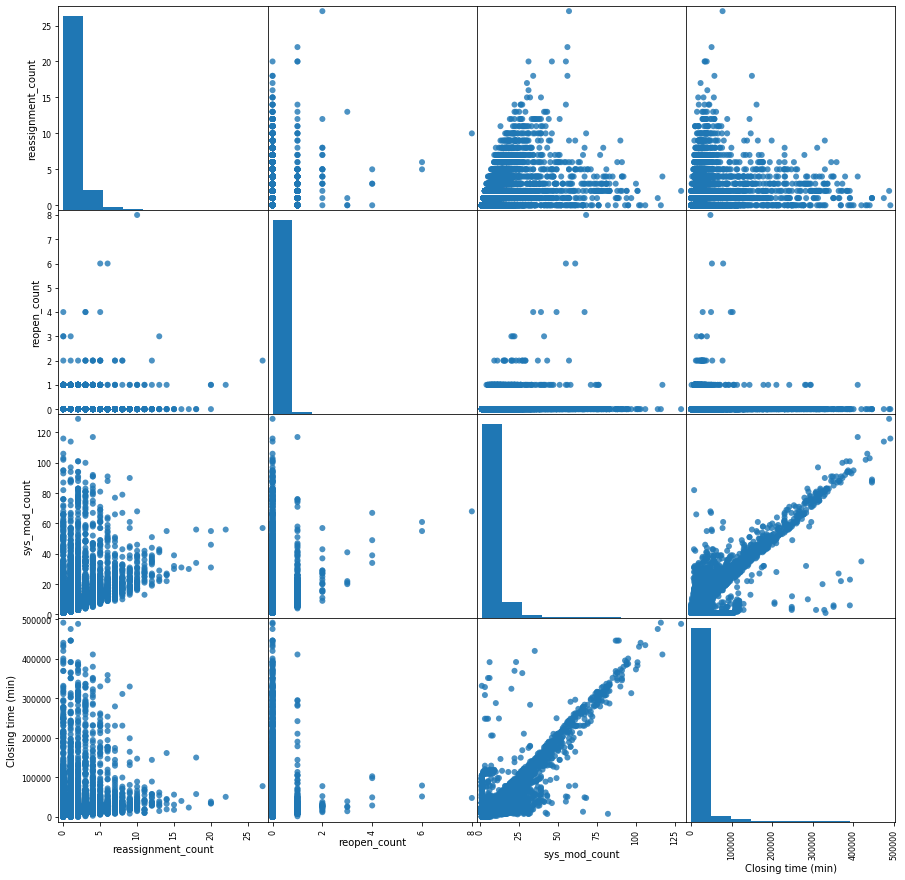

In [122]:
#Scatter plot for numeric values
from pandas.plotting import scatter_matrix

temp = df_im2[['reassignment_count','reopen_count','sys_mod_count','Closing time (min)']]
scatter_matrix(temp,figsize = (15,15), alpha = 0.8, marker = 'O')

In [123]:
#As we can see from the scatter plot, data all the numeric columns are left Skewed.
#We need to remove outliers and make the distribution of the data close to noraml.

def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

l,u = outlier_treatment(df_im2['Closing time (min)'])
df_im2.drop(df_im2[ (df_im2['Closing time (min)'] > u) | (df_im2['Closing time (min)'] < l) ].index , inplace=True)

l,u = outlier_treatment(df_im2['sys_mod_count'])
df_im2.drop(df_im2[ (df_im2['sys_mod_count'] > u) | (df_im2['sys_mod_count'] < l) ].index , inplace=True)

l,u = outlier_treatment(df_im2['reassignment_count'])
df_im2.drop(df_im2[ (df_im2['reassignment_count'] > u) | (df_im2['reassignment_count'] < l) ].index , inplace=True)

l,u = outlier_treatment(df_im2['reopen_count'])
df_im2.drop(df_im2[ (df_im2['reopen_count'] > u) | (df_im2['reopen_count'] < l) ].index , inplace=True)


In [124]:
df_im2.shape

(20409, 14)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF0F95EF08>,
      dtype=object)

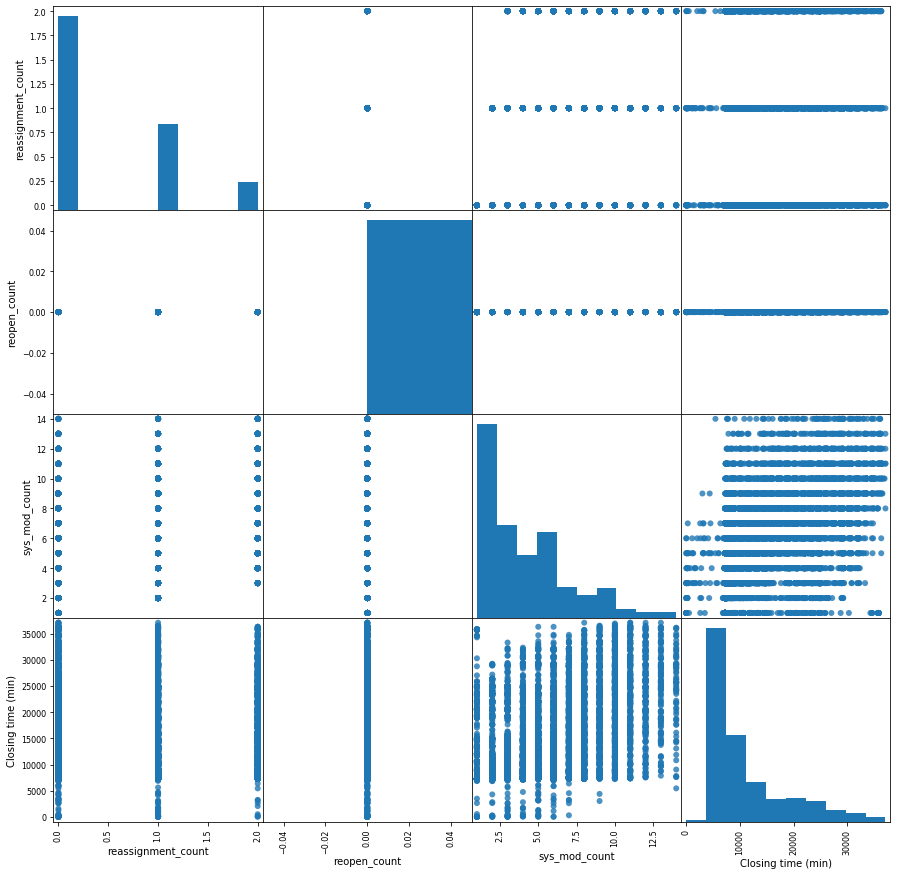

In [125]:
import warnings
warnings.filterwarnings("ignore")


#Scatter plot for numeric values
temp2 = df_im2[['reassignment_count','reopen_count','sys_mod_count','Closing time (min)']]
scatter_matrix(temp2,figsize = (15,15), alpha = 0.8, marker = 'O')

## Preparation for ML

In [126]:
#Converting categories into numeric forms

df_im2['made_sla'] = df_im2['made_sla'].astype('str')
df_im2['made_sla'] = df_im2['made_sla'].map({'True':1,'False':0}).astype('int64')

In [127]:
#Converting categories into numeric forms

contact_type_dummy=pd.get_dummies(df_im2['contact_type'],columns='contact_type',prefix='contact_type')
df_im2=pd.concat([df_im2, contact_type_dummy], axis=1)
df_im2.drop(['contact_type'],axis=1,inplace= True)

In [128]:
df_im2["priority"].unique()

array(['3 - Moderate', '2 - High', '4 - Low', '1 - Critical'],
      dtype=object)

In [129]:
#Converting categories into numeric forms

scale_mapper = {'1 - Critical':4,'2 - High':3,'3 - Moderate':2,'4 - Low':1}
df_im2["priority"].replace(scale_mapper,inplace= True)
df_im2["priority"] = df_im2["priority"].astype(int)

In [130]:
#Converting categories into numeric forms

df_im2['knowledge']= df_im2['knowledge'].astype('str')
df_im2['knowledge']= df_im2['knowledge'].map({'True':0,'False':1}).astype(int)

In [131]:
#Converting categories into numeric forms

df_im2['u_priority_confirmation']= df_im2['u_priority_confirmation'].astype('str')
df_im2['u_priority_confirmation']= df_im2['u_priority_confirmation'].map({'True':1,'False':0}).astype(int)

In [132]:
df_im2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20409 entries, 0 to 24984
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   number                       20409 non-null  object
 1   incident_state               20409 non-null  object
 2   active                       20409 non-null  bool  
 3   reassignment_count           20409 non-null  int32 
 4   reopen_count                 20409 non-null  int32 
 5   sys_mod_count                20409 non-null  int32 
 6   made_sla                     20409 non-null  int64 
 7   category                     20409 non-null  object
 8   priority                     20409 non-null  int32 
 9   assignment_group             20409 non-null  object
 10  knowledge                    20409 non-null  int32 
 11  u_priority_confirmation      20409 non-null  int32 
 12  Closing time (min)           20409 non-null  int64 
 13  contact_type_Direct opening  20

In [133]:
df_im2.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,category,priority,assignment_group,knowledge,u_priority_confirmation,Closing time (min),contact_type_Direct opening,contact_type_Email,contact_type_IVR,contact_type_Phone,contact_type_Self service
0,INC0000045,Closed,False,0,0,4,1,Category 55,2,Group 56,0,0,7844,0,0,0,1,0
1,INC0000047,Closed,False,1,0,8,1,Category 40,2,Group 24,0,0,8960,0,0,0,1,0
2,INC0000057,Closed,False,0,0,6,1,Category 20,2,Group 70,0,0,8450,0,0,0,1,0
3,INC0000060,Closed,False,0,0,3,1,Category 9,2,Group 25,0,0,10462,0,0,0,1,0
4,INC0000062,Closed,False,1,0,7,0,Category 53,3,Group 23,0,0,7742,0,0,0,1,0


In [134]:
# Since columns 'number','incident_state' and 'active' does not provide any useful information, removing those columns 
df_im2 = df_im2.drop(columns={'number','incident_state','active'})

In [135]:
#Here category and assignment depends on each other since we can interprete that category of an incident decides the assignment group.
df_im2.drop(['assignment_group'],axis=1,inplace= True)

In [136]:
category_dummy=pd.get_dummies(df_im2['category'],columns='category',prefix='category')
df_im2=pd.concat([df_im2, category_dummy], axis=1)
df_im2.drop(['category'],axis=1,inplace= True)

#### Since this is a fairly large dataset and the computation cost for this dataset specially for SVM models are pretty large, we are taking only sample of the data and running all the models on it. The shape of the dataset which is used for ML is as below.

In [137]:
#Let's shuffle the data
df_im3 = df_im2.sample(frac=0.1, random_state=5).reset_index(drop=True)
df_im3.shape

(2041, 65)

### Splitting and scaling dataset

In [138]:
# feature set and targer set
X = df_im3.drop('Closing time (min)', axis = 1)
y = df_im3['Closing time (min)']

In [139]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

# scale the dataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# 1- instantiate the model
scaler = MinMaxScaler()
# 2 - fit on train dataset: find the min and max of each column of the train dataset
scaler.fit(X_train_org)
# 3 - use the min and max of each column to scale both train and test dataset
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [140]:
X_train_df = pd.DataFrame(X_train, columns= X.columns)
X_test_df = pd.DataFrame(X_test, columns= X.columns)
X_train_df.head()

,reassignment_count,reopen_count,sys_mod_count,made_sla,priority,knowledge,u_priority_confirmation,contact_type_Direct opening,contact_type_Email,contact_type_IVR,contact_type_Phone,contact_type_Self service,category_Category 10,category_Category 12,category_Category 13,category_Category 14,category_Category 16,category_Category 17,category_Category 19,category_Category 2,category_Category 20,category_Category 21,category_Category 22,category_Category 23,category_Category 24,category_Category 25,category_Category 26,category_Category 28,category_Category 29,category_Category 31,category_Category 32,category_Category 33,category_Category 34,category_Category 35,category_Category 36,category_Category 37,category_Category 38,category_Category 4,category_Category 40,category_Category 42,category_Category 43,category_Category 44,category_Category 45,category_Category 46,category_Category 47,category_Category 48,category_Category 5,category_Category 50,category_Category 51,category_Category 52,category_Category 53,category_Category 54,category_Category 55,category_Category 56,category_Category 57,category_Category 58,category_Category 59,category_Category 6,category_Category 61,category_Category 62,category_Category 63,category_Category 7,category_Category 8,category_Category 9
0,0.0,0.0,0.230769,1.0,0.333333,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.076923,1.0,0.333333,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.5,0.0,0.153846,1.0,0.333333,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.076923,1.0,0.333333,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.769231,0.0,0.333333,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
X_train_df.describe()

,reassignment_count,reopen_count,sys_mod_count,made_sla,priority,knowledge,u_priority_confirmation,contact_type_Direct opening,contact_type_Email,contact_type_IVR,contact_type_Phone,contact_type_Self service,category_Category 10,category_Category 12,category_Category 13,category_Category 14,category_Category 16,category_Category 17,category_Category 19,category_Category 2,category_Category 20,category_Category 21,category_Category 22,category_Category 23,category_Category 24,category_Category 25,category_Category 26,category_Category 28,category_Category 29,category_Category 31,category_Category 32,category_Category 33,category_Category 34,category_Category 35,category_Category 36,category_Category 37,category_Category 38,category_Category 4,category_Category 40,category_Category 42,category_Category 43,category_Category 44,category_Category 45,category_Category 46,category_Category 47,category_Category 48,category_Category 5,category_Category 50,category_Category 51,category_Category 52,category_Category 53,category_Category 54,category_Category 55,category_Category 56,category_Category 57,category_Category 58,category_Category 59,category_Category 6,category_Category 61,category_Category 62,category_Category 63,category_Category 7,category_Category 8,category_Category 9
count,1530.000000,1530.0,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.0,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.0,1530.000000,1530.0,1530.0,1530.000000,1530.000000,1530.000000,1530.000000,1530.0,1530.000000,1530.000000,1530.000000,1530.0,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.0,1530.000000,1530.000000,1530.0,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.0,1530.0,1530.000000,1530.000000,1530.000000,1530.0,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.0,1530.0,1530.000000,1530.000000,1530.0,1530.000000,1530.000000,1530.000000,1530.000000
mean,0.232026,0.0,0.243489,0.725490,0.334423,0.874510,0.757516,0.0,0.006536,0.000654,0.988235,0.004575,0.001307,0.0,0.004575,0.0,0.0,0.007190,0.006536,0.000654,0.035294,0.0,0.001961,0.044444,0.022222,0.0,0.150327,0.024837,0.000654,0.000654,0.052288,0.0,0.013725,0.020261,0.0,0.039869,0.001307,0.000654,0.016993,0.149673,0.010458,0.010458,0.017647,0.092810,0.0,0.0,0.000654,0.001307,0.021569,0.0,0.118954,0.000654,0.003922,0.000654,0.038562,0.0,0.0,0.000654,0.028758,0.0,0.001307,0.000654,0.002614,0.052941
std,0.324628,0.0,0.210678,0.446413,0.096815,0.331382,0.428725,0.0,0.080607,0.025565,0.107861,0.067507,0.036143,0.0,0.067507,0.0,0.0,0.084513,0.080607,0.025565,0.184583,0.0,0.044252,0.206148,0.147454,0.0,0.357508,0.155678,0.025565,0.025565,0.222679,0.0,0.116387,0.140939,0.0,0.195716,0.036143,0.025565,0.129289,0.356867,0.101759,0.101759,0.131708,0.290262,0.0,0.0,0.025565,0.036143,0.145318,0.0,0.323841,0.025565,0.062520,0.025565,0.192612,0.0,0.0,0.025565,0.167181,0.0,0.036143,0.025565,0.051081,0.223989
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.076923,0.000000,0.333333,1.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000

In [142]:
X_test_df.describe()

,reassignment_count,reopen_count,sys_mod_count,made_sla,priority,knowledge,u_priority_confirmation,contact_type_Direct opening,contact_type_Email,contact_type_IVR,contact_type_Phone,contact_type_Self service,category_Category 10,category_Category 12,category_Category 13,category_Category 14,category_Category 16,category_Category 17,category_Category 19,category_Category 2,category_Category 20,category_Category 21,category_Category 22,category_Category 23,category_Category 24,category_Category 25,category_Category 26,category_Category 28,category_Category 29,category_Category 31,category_Category 32,category_Category 33,category_Category 34,category_Category 35,category_Category 36,category_Category 37,category_Category 38,category_Category 4,category_Category 40,category_Category 42,category_Category 43,category_Category 44,category_Category 45,category_Category 46,category_Category 47,category_Category 48,category_Category 5,category_Category 50,category_Category 51,category_Category 52,category_Category 53,category_Category 54,category_Category 55,category_Category 56,category_Category 57,category_Category 58,category_Category 59,category_Category 6,category_Category 61,category_Category 62,category_Category 63,category_Category 7,category_Category 8,category_Category 9
count,511.000000,511.0,511.000000,511.000000,511.000000,511.000000,511.000000,511.0,511.000000,511.000000,511.000000,511.000000,511.0,511.0,511.000000,511.0,511.0,511.0,511.000000,511.0,511.000000,511.0,511.0,511.000000,511.000000,511.000000,511.000000,511.000000,511.0,511.0,511.000000,511.0,511.000000,511.000000,511.0,511.000000,511.0,511.0,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.0,511.0,511.0,511.000000,511.000000,511.0,511.000000,511.000000,511.000000,511.000000,511.000000,511.0,511.0,511.0,511.000000,511.0,511.0,511.0,511.000000,511.000000
mean,0.218200,0.0,0.225199,0.761252,0.334638,0.890411,0.759295,0.0,0.001957,0.001957,0.990215,0.005871,0.0,0.0,0.001957,0.0,0.0,0.0,0.003914,0.0,0.041096,0.0,0.0,0.041096,0.023483,0.001957,0.156556,0.029354,0.0,0.0,0.076321,0.0,0.009785,0.025440,0.0,0.046967,0.0,0.0,0.011742,0.158513,0.005871,0.013699,0.013699,0.097847,0.0,0.0,0.0,0.003914,0.029354,0.0,0.097847,0.001957,0.009785,0.001957,0.019569,0.0,0.0,0.0,0.041096,0.0,0.0,0.0,0.001957,0.033268
std,0.328158,0.0,0.196214,0.426736,0.093343,0.312683,0.427930,0.0,0.044237,0.044237,0.098529,0.076471,0.0,0.0,0.044237,0.0,0.0,0.0,0.062500,0.0,0.198707,0.0,0.0,0.198707,0.151581,0.044237,0.363738,0.168963,0.0,0.0,0.265771,0.0,0.098529,0.157613,0.0,0.211775,0.0,0.0,0.107827,0.365579,0.076471,0.116351,0.116351,0.297399,0.0,0.0,0.0,0.062500,0.168963,0.0,0.297399,0.044237,0.098529,0.044237,0.138651,0.0,0.0,0.0,0.198707,0.0,0.0,0.0,0.044237,0.179512
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.0,0.076923,1.000000,0.333333,1.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,0.0,0.153846,1.000000,0.333333,1.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.

## Machine Learning

### KNN regressor

Text(0, 0.5, 'Score')

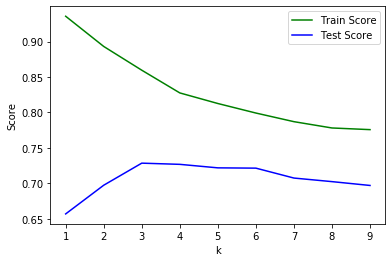

In [143]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('Score')

The idel value of K seesm to be 5 where we have highest training and testing score.

In [144]:
#Re-run the model with K=5.

k=5
knn_reg = KNeighborsRegressor(k)
knn_reg.fit(X_train, y_train)
train_score = knn_reg.score(X_train, y_train)
test_score = knn_reg.score(X_test, y_test)
print(train_score)
print(test_score)

0.8126511947645135
0.7218710645990889


In [145]:
#KNN Cross-validation score
from sklearn.model_selection import cross_val_score

k=5
knn_reg = KNeighborsRegressor(k)

scores = cross_val_score(knn_reg, X_train,y_train)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.4f}".format(scores.mean()))

Cross-validation scores: [0.69570436 0.78742226 0.70826166 0.66810907 0.68256245]
Average cross-validation score: 0.7084


### Linear Equation Normal Equation

In [146]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.8009494612708418
-1.3190924021363906e+17


In [147]:
#Linear Cross-validation score
from sklearn.model_selection import cross_val_score

lreg = LinearRegression()

scores = cross_val_score(lreg, X_train,y_train)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.4f}".format(scores.mean()))

Cross-validation scores: [-1.91411946e+21 -2.71328324e+19  7.84693554e-01 -1.02869617e+20
 -8.42061278e+15]
Average cross-validation score: -408826066302007574528.0000


Text(0.5, 0, 'RM')

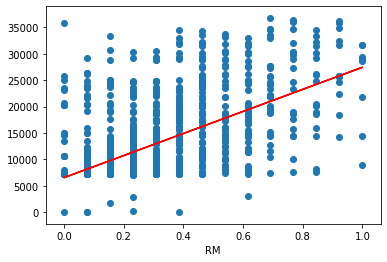

In [148]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,2].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

### Ridge Regression

In [149]:
from  sklearn.linear_model import Ridge

x_range = [0.001,0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

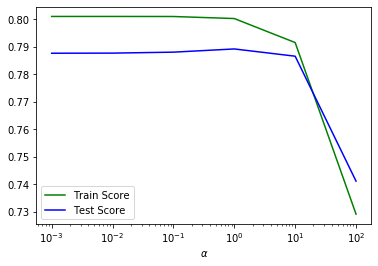

In [150]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

As we can see we can take value of alpha = 10

In [151]:
print(train_score_list)
print(test_score_list)

[0.8009500447444508, 0.8009497843374476, 0.800928326130748, 0.8001849851346372, 0.7914551407537407, 0.7290870476521067]
[0.7875762021467299, 0.787618182771423, 0.7879671704980988, 0.7891327840807995, 0.7864974329632793, 0.741078377511263]


In [152]:
#Re-run the model
ridge = Ridge(alpha = 10)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.7915
Test score: 0.7865


In [153]:
#Ridge Rigression with Cross Validation
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha = 10)

scores = cross_val_score(ridge, X_train,y_train)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.79056009 0.81685983 0.7838816  0.76170546 0.73807714]
Average cross-validation score: 0.78


### LASSO Regression

In [154]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

In [155]:
print(train_score_list)
print(test_score_list)

[0.8009499783128334, 0.8009430479636366, 0.8005954896057328, 0.7944484921294491, 0.7600567534464509]
[0.7874697874754685, 0.7879539624813389, 0.7895709051575662, 0.7892099616315615, 0.7626960848890513]


Text(0.5, 0, '$\\alpha$')

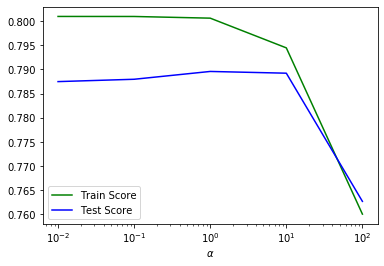

In [156]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

The ideal value of alpha = 10

In [157]:
#Re-run the model
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))

Train score: 0.7944
Test score: 0.7892


In [158]:
#Lasso Rigression with Cross Validation
from sklearn.model_selection import cross_val_score

lasso = Lasso(alpha = 10)

scores = cross_val_score(lasso, X_train,y_train)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.80064028 0.82156124 0.78982248 0.77214311 0.74821183]
Average cross-validation score: 0.79


### Polynomial Regression

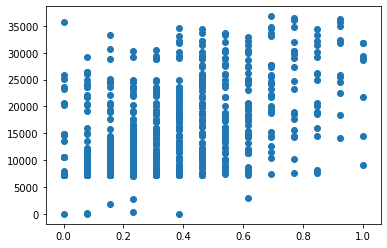

In [159]:
from  sklearn.preprocessing  import PolynomialFeatures

X_train_1 = X_train[:,2].reshape(-1,1)
plt.scatter(X_train_1,y_train)

In [160]:
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [161]:
print(train_score_list)
print(test_score_list)

[0.8009436080543892, 0.876196273393083]
[-7.980931804241722e+20, -4.387007136936455e+23]


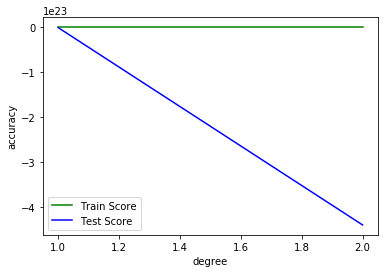

In [162]:
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

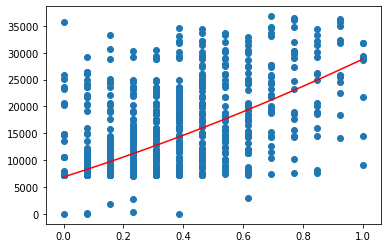

In [163]:
poly = PolynomialFeatures(n)
X_train_poly = poly.fit_transform(X_train_1)
lreg.fit(X_train_poly, y_train)

x_axis = np.linspace(0,1,100).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict = lreg.predict(x_poly)

X_train_1 = X_train[:,2].reshape(-1,1)
plt.scatter(X_train_1,y_train)
plt.plot(x_axis, y_predict, c = 'r')

### SVR Simple

In [164]:
from sklearn.svm import LinearSVR
regressor = LinearSVR()
regressor.fit(X_train, y_train)
train_score = regressor.score(X_train, y_train)
test_score = regressor.score(X_test, y_test)

In [165]:
print(train_score)
print(test_score)

-0.8119236008547819
-0.7832426122336367


In [166]:
#SVM Rigression with Cross Validation
from sklearn.model_selection import cross_val_score

regressor = LinearSVR()

scores = cross_val_score(regressor, X_train,y_train)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [-1.00462919 -1.16717384 -1.09930282 -1.12424156 -1.00829449]
Average cross-validation score: -1.08


### SVR with Kernal trick (Linear)

In [167]:
from sklearn.svm import SVR

train_score_array = []
test_score_array = []
x_range = [0.001, 0.01, 0.1, 1, 10, 100,1000]

for alpha in x_range: 
    svr_linear = SVR(kernel='linear',C=alpha)
    svr_linear.fit(X_train, y_train)
    train_score_array.append(svr_linear.score(X_train, y_train))
    test_score_array.append(svr_linear.score(X_test, y_test))

In [168]:
print(train_score_array)
print(test_score_array)

[-0.34154056335259564, -0.34076371876294176, -0.3337759161355638, -0.2608396899795069, 0.31170375850375864, 0.7368468170511215, 0.7729134443038882]
[-0.2896380222576429, -0.28886970252552735, -0.28194484324811797, -0.2100035471699164, 0.3435958547122666, 0.7511109257602664, 0.7790112530573888]


Text(0.5, 0, 'Regularization parameter: C')

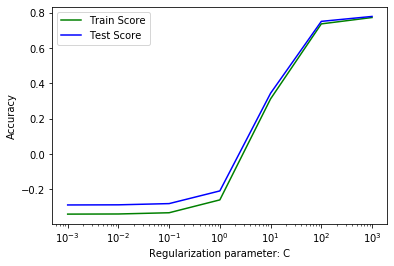

In [169]:
plt.plot(x_range, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_array, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xlabel('Regularization parameter: C')

The best value of C seems to be 1000

In [170]:
#Running model again with C=1000

svr_linear = SVR(kernel='linear',C=1000)
svr_linear.fit(X_train, y_train)
train_score = svr_linear.score(X_train, y_train)
test_score = svr_linear.score(X_test, y_test)

In [171]:
print(train_score)
print(test_score)

0.7729134443038882
0.7790112530573888


In [172]:
#SVML Rigression with Cross Validation
from sklearn.model_selection import cross_val_score

svr_linear = SVR(kernel='linear',C=1000)
scores = cross_val_score(svr_linear, X_train,y_train)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.76789677 0.81147692 0.77426966 0.74752755 0.72016212]
Average cross-validation score: 0.76


### SVM with Kernal trick (rbf)

In [173]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_rbf = SVR(kernel='rbf')

parameters = [{'C':[0.001, 0.01, 0.1, 1, 10, 100,1000],'gamma':[0.1,0.2,0.3,0.4,0.5]}]

rsvc_grid_rbf =  GridSearchCV(estimator = svr_rbf,
                           param_grid = parameters,
                         cv = 5)

rsvc_grid_rbf  = rsvc_grid_rbf.fit(X_train,y_train)

In [174]:
print("Best Score for RBF kernel svm regression from grid search: ",rsvc_grid_rbf.best_score_)
print("Best parameter for RBF kernel svm regression from grid search: ",rsvc_grid_rbf.best_params_)

Best Score for RBF kernel svm regression from grid search:  0.7699067378968616
Best parameter for RBF kernel svm regression from grid search:  {'C': 1000, 'gamma': 0.4}


In [175]:
#Running model again with C=1000, gamma = 0.4

svr_rbf = SVR(kernel='rbf',C=1000, gamma=0.4)
svr_rbf.fit(X_train, y_train)
train_score = svr_rbf.score(X_train, y_train)
test_score = svr_rbf.score(X_test, y_test)

In [176]:
print(train_score)
print(test_score)

0.7954072457718208
0.7761963645635382


In [177]:
#SVMR Rigression with Cross Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svr_rbf, X_train,y_train)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.76262771 0.80901066 0.77417167 0.77326583 0.73045782]
Average cross-validation score: 0.77


### SVM with Kernal trick (poly)

In [178]:
from sklearn.svm import SVR

svr_ploy = SVR(kernel='poly')

parameters = [{'C':[0.001, 0.01, 0.1, 1, 10, 100,1000],'degree':[1,2,3,4,5]}]

rsvc_grid_poly =  GridSearchCV(estimator = svr_ploy,
                           param_grid = parameters,
                         cv = 5)

rsvc_grid_poly  = rsvc_grid_poly.fit(X_train,y_train)

In [179]:
print("Best Score for RBF kernel svm regression from grid search: ",rsvc_grid_poly.best_score_)
print("Best parameter for RBF kernel svm regression from grid search: ",rsvc_grid_poly.best_params_)

Best Score for RBF kernel svm regression from grid search:  0.7485749487803576
Best parameter for RBF kernel svm regression from grid search:  {'C': 1000, 'degree': 1}


In [180]:
#Running model again with C=1000, degree = 1

svr_poly = SVR(kernel='poly',C=1000, degree=1)
svr_poly.fit(X_train, y_train)
train_score = svr_poly.score(X_train, y_train)
test_score = svr_poly.score(X_test, y_test)

In [181]:
print(train_score)
print(test_score)

0.7588189324519944
0.7709954177773709


In [182]:
#SVMP Rigression with Cross Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svr_poly, X_train,y_train)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.74311696 0.7948244  0.76293004 0.73771782 0.70428553]
Average cross-validation score: 0.75


In [183]:
df_index=['KNN','Linear','Ridge','Lasso','Polynomial','SVR','Linear Kernel SVR','RBF Kernel SVR','Poly Kernel SVR']
Regression_Result=pd.DataFrame(columns=['Model_Name','Best_Parameter','Training_score','CV_Score','Testing_score'],index=df_index)
Regression_Result['Model_Name']=Regression_Result.index

In [184]:
#KNN 
Regression_Result.loc['KNN']['Best_Parameter']='K=5'
Regression_Result.loc['KNN']['Training_score']=0.81
Regression_Result.loc['KNN']['CV_Score']=0.70
Regression_Result.loc['KNN']['Testing_score']=0.72

In [185]:
#Linear Rigression
Regression_Result.loc['Linear']['Training_score']=0.80
Regression_Result.loc['Linear']['CV_Score']=-4.08e+20
Regression_Result.loc['Linear']['Testing_score']=-1.31e+17

In [186]:
#Ridge
Regression_Result.loc['Ridge']['Best_Parameter']='alpha=10'
Regression_Result.loc['Ridge']['Training_score']=0.79
Regression_Result.loc['Ridge']['CV_Score']=0.78
Regression_Result.loc['Ridge']['Testing_score']=0.78

In [187]:
#LASSO
Regression_Result.loc['Lasso']['Best_Parameter']='alpha=10'
Regression_Result.loc['Lasso']['Training_score']=0.79
Regression_Result.loc['Lasso']['CV_Score']=0.79
Regression_Result.loc['Lasso']['Testing_score']=0.78

In [188]:
#Polynomial
Regression_Result.loc['Polynomial']['Best_Parameter']='degree=1'
Regression_Result.loc['Polynomial']['Training_score']=0.80
Regression_Result.loc['Polynomial']['CV_Score']= 'N/A' 
Regression_Result.loc['Polynomial']['Testing_score']=-7.9e+20

In [189]:
#SVR Linear
Regression_Result.loc['SVR']['Training_score']= - 0.81
Regression_Result.loc['SVR']['CV_Score']= -1.08 
Regression_Result.loc['SVR']['Testing_score']= -0.78

In [190]:
#SVR Kernal trick (linear)
Regression_Result.loc['Linear Kernel SVR']['Best_Parameter']='C=1000'
Regression_Result.loc['Linear Kernel SVR']['Training_score']=0.77
Regression_Result.loc['Linear Kernel SVR']['CV_Score']= 0.76
Regression_Result.loc['Linear Kernel SVR']['Testing_score']=0.77

In [191]:
#SVR Kernal trick (rbf)
Regression_Result.loc['RBF Kernel SVR']['Best_Parameter']='C=1000,gamma=0.4'
Regression_Result.loc['RBF Kernel SVR']['Training_score']=0.79
Regression_Result.loc['RBF Kernel SVR']['CV_Score']= 0.77
Regression_Result.loc['RBF Kernel SVR']['Testing_score']=0.77

In [192]:
#SVR Kernal trick (poly)
Regression_Result.loc['Poly Kernel SVR']['Best_Parameter']='C=1000,degree=1'
Regression_Result.loc['Poly Kernel SVR']['Training_score']=0.75
Regression_Result.loc['Poly Kernel SVR']['CV_Score']= 0.75
Regression_Result.loc['Poly Kernel SVR']['Testing_score']=0.77

In [193]:
Regression_Result

,Model_Name,Best_Parameter,Training_score,CV_Score,Testing_score
KNN,KNN,K=5,0.81,0.7,0.72
Linear,Linear,NaN,0.8,-4.08e+20,-1.31e+17
Ridge,Ridge,alpha=10,0.79,0.78,0.78
Lasso,Lasso,alpha=10,0.79,0.79,0.78
Polynomial,Polynomial,degree=1,0.8,N/A,-7.9e+20
SVR,SVR,NaN,-0.81,-1.08,-0.78
Linear Kernel SVR,Linear Kernel SVR,C=1000,0.77,0.76,0.77
RBF Kernel SVR,RBF Kernel SVR,"C=1000,gamma=0.4",0.79,0.77,0.77
Poly Kernel SVR,Poly Kernel SVR,"C=1000,degree=1",0.75,0.75,0.77


### In our case, Lasso Regression has the highest accuracy for training & testing set as well as for Cross-Validation.

Re-run the model on entire dataset with best parameters of Lasso

In [194]:
X_full_data = scaler.fit_transform(X)
X_full_data_df = pd.DataFrame(X_full_data, columns= X.columns)
X_full_data_df.head()

,reassignment_count,reopen_count,sys_mod_count,made_sla,priority,knowledge,u_priority_confirmation,contact_type_Direct opening,contact_type_Email,contact_type_IVR,contact_type_Phone,contact_type_Self service,category_Category 10,category_Category 12,category_Category 13,category_Category 14,category_Category 16,category_Category 17,category_Category 19,category_Category 2,category_Category 20,category_Category 21,category_Category 22,category_Category 23,category_Category 24,category_Category 25,category_Category 26,category_Category 28,category_Category 29,category_Category 31,category_Category 32,category_Category 33,category_Category 34,category_Category 35,category_Category 36,category_Category 37,category_Category 38,category_Category 4,category_Category 40,category_Category 42,category_Category 43,category_Category 44,category_Category 45,category_Category 46,category_Category 47,category_Category 48,category_Category 5,category_Category 50,category_Category 51,category_Category 52,category_Category 53,category_Category 54,category_Category 55,category_Category 56,category_Category 57,category_Category 58,category_Category 59,category_Category 6,category_Category 61,category_Category 62,category_Category 63,category_Category 7,category_Category 8,category_Category 9
0,0.0,0.0,0.076923,1.0,0.666667,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.076923,1.0,0.333333,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.5,0.0,0.615385,0.0,0.333333,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.5,0.0,0.384615,1.0,0.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.5,0.0,0.153846,1.0,0.333333,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [195]:
lasso = Lasso(alpha = 10)
lasso.fit(X_full_data,y)
print('Train score: {:.4f}'.format(lasso.score(X_full_data,y)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))

Train score: 0.7940
Test score: 0.7967


In [196]:
#Converting actual values to dataframe for comparison
y_test_df = pd.DataFrame(y_test).reset_index(drop=True).rename(columns={'Closing time (min)':'Actual_Closing time (min)'})

In [197]:
#Predicting the target variable

pred_test_lasso= lasso.predict(X_test)
pred_test_lasso_df = pd.DataFrame(pred_test_lasso).rename(columns={0:'Pred_Closing Time (min)'}).astype('int64')
pred_test_lasso_df = pd.concat([pred_test_lasso_df, y_test_df], axis=1)
pred_test_lasso_df.head(20)


,Pred_Closing Time (min),Actual_Closing time (min)
0,7774,7246
1,7264,7224
2,6915,7236
3,7085,7256
4,10765,11813
5,12549,10179
6,7284,7215
7,18247,13561
8,7284,11496
9,7085,7214


In [198]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('Mean Squared Error : ' ,np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print('R Squre : ',r2_score(y_test, pred_test_lasso))

Mean Squared Error :  2953.012326795585
R Squre :  0.7966577340765846
